In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from os import path
import numpy as np

base_path = '/opt/data/pixel-annot-export/'
ann_path = '/opt/data/pixel-annot-export/pixel_df_list/'

sf = 'C9H14N4O3'
adduct = '+H'
ds_name = 'WB_tumor_zoom_08042015_vehicle'

ds_df_path = path.join(base_path, 'ds_df.msgpack')
ds_df = pd.read_msgpack(ds_df_path)
ds_ind = ds_df[ds_df['name'] == ds_name].index.tolist()[0]

ion_df_path = path.join(base_path, 'ion_df.msgpack')
ion_df = pd.read_msgpack(ion_df_path)
ion_ind = ion_df[ion_df.formula == sf][ion_df.adduct == adduct].index.tolist()[0]

print(ds_ind, ion_ind)

pixel_df_path = path.join(ann_path, '{}.msgpack'.format(ds_ind))
all_pixel_df = pd.read_msgpack(pixel_df_path)
all_pixel_df = pd.merge(all_pixel_df, ion_df, left_on='ion_ind', right_index=True).drop_duplicates()

ion_sub_df = all_pixel_df[(all_pixel_df.formula == sf)&(all_pixel_df.adduct == adduct)]


/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


792 48655


In [40]:
def hotspot_removal(img):
    perc99_v = np.percentile(img, q=99.9)
    img[img > perc99_v] = perc99_v
    return img

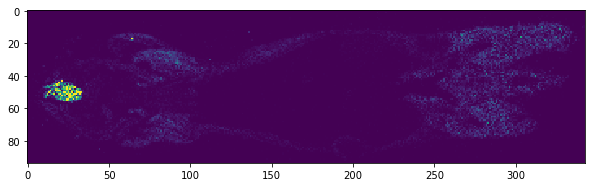

In [41]:
img = pd.pivot(ion_sub_df.y.values, ion_sub_df.x.values, ion_sub_df.int.values).fillna(0).values
img = hotspot_removal(img)
plt.figure(figsize=(10,10))
plt.imshow(img)